# Import all the Dependencies

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# initializing the CNN

CNN_Classifier=Sequential()

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# flattening

CNN_Classifier.add(Flatten())

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))
 
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary

In [16]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

# Building and Compiling the Model

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\potato\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\potato\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=50,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Found 2152 images belonging to 3 classes.
Found 139 images belonging to 3 classes.
Epoch 1/50
68/68 [==============================] - 20s 291ms/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.1141 - val_accuracy: 0.9640
Epoch 2/50
68/68 [==============================] - 17s 241ms/step - loss: 0.0228 - accuracy: 0.9907 - val_loss: 0.0308 - val_accuracy: 0.9856
Epoch 3/50
68/68 [==============================] - 17s 254ms/step - loss: 0.0364 - accuracy: 0.9837 - val_loss: 0.0416 - val_accuracy: 0.9856
Epoch 4/50
68/68 [==============================] - 18s 265ms/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 0.0494 - val_accuracy: 0.9784
Epoch 5/50
68/68 [==============================] - 18s 259ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0721 - val_accuracy: 0.9784
Epoch 6/50
68/68 [==============================] - 18s 259ms/step - loss: 0.0259 - accuracy: 0.9907 - val_loss: 0.2091 - val_accuracy: 0.9424
Epoch 7/50
68/68 [==============================] - 18s 256

In [35]:
scores = CNN_Classifier.evaluate(test_set)

5/5 [==============================] - 0s 50ms/step - loss: 0.0166 - accuracy: 0.9928


# Defining Classes

In [24]:
training_set.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [26]:
class_names = list(training_set.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [28]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.62636113 0.5976366  0.6353771 ]
  [0.633463   0.6020905  0.65307087]
  [0.63812363 0.6067511  0.6577315 ]
  ...
  [0.6330633  0.61737704 0.672279  ]
  [0.62770593 0.61201966 0.6669216 ]
  [0.62769765 0.6120114  0.669012  ]]

 [[0.6344737  0.60546136 0.64464074]
  [0.6504424  0.6190699  0.67005026]
  [0.6298303  0.59845775 0.64943814]
  ...
  [0.62455636 0.6080408  0.66294277]
  [0.6214108  0.6048953  0.65979725]
  [0.64279693 0.62672704 0.68373644]]

 [[0.638977   0.60760444 0.65858483]
  [0.6545009  0.62312835 0.67410874]
  [0.6211207  0.58974814 0.64072853]
  ...
  [0.642898   0.6193686  0.6742706 ]
  [0.6685188  0.6449894  0.6998913 ]
  [0.6747119  0.6554147  0.71243274]]

 ...

 [[0.42997813 0.37264937 0.41398117]
  [0.42895192 0.37797153 0.4171872 ]
  [0.43184835 0.38086796 0.42008364]
  ...
  [0.4740577  0.4230773  0.48974398]
  [0.46957707 0.41859668 0.48526335]
  [0.47636405 0.42538366 0.49205032]]

 [[0.43573663 0.38408777 0.42352626]
  [0.43053955 0.37955913 0.4187748 ]


# Plotting

Matplotlib is building the font cache; this may take a moment.


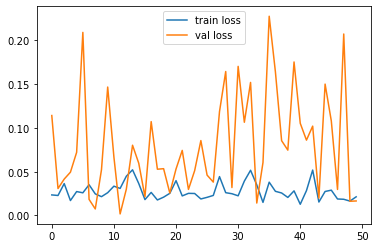

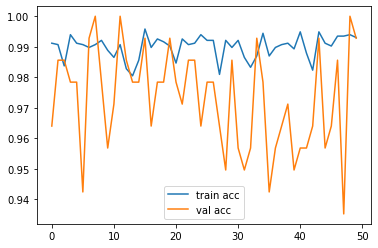

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving Model 

In [36]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\potato_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\potato_model.h5')

# Loading Model

In [17]:
from tensorflow.keras.models import load_model
new_model = load_model(r'C:\Users\touheed\Documents\potato Model\potato_model.h5')

# Summary

In [18]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

# Run prediction on a sample image

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 622ms/step
predicted label: Potato___healthy


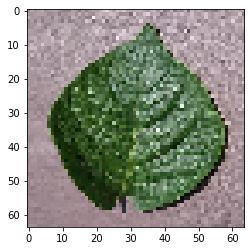

In [32]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break